PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [ ]:
import tensorflow  as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data = pd.read_csv('forestfires.csv')

In [ ]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [ ]:
data.shape

(517, 31)

In [ ]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [ ]:
x = data.iloc[:,2:30]

In [ ]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
y = data[['size_category']]

In [ ]:
y.head()

,size_category
0,small
1,small
2,small
3,small
4,small


In [ ]:
d=[]
for i in y['size_category'] :
  if i == 'small':
    d.append(0)
  else:
    d.append(1)
d

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
y.size_category = d

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
y.head()

,size_category
0,0
1,0
2,0
3,0
4,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [ ]:
# create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(32, input_dim=28, activation='sigmoid'))
model.add(tf.keras.layers.Dense(25,  activation='sigmoid'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                928       
_________________________________________________________________
dense_16 (Dense)             (None, 25)                825       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 26        
Total params: 1,779
Trainable params: 1,779
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
history=model.fit(x_train, y_train, validation_split=0.20, epochs=100, batch_size=10)

Epoch 1/100
33/33 [==============================] - 1s 7ms/step - loss: 0.6228 - accuracy: 0.7152 - val_loss: 0.5623 - val_accuracy: 0.7590
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7152 - val_loss: 0.5484 - val_accuracy: 0.7590
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.7152 - val_loss: 0.5395 - val_accuracy: 0.7590
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5728 - accuracy: 0.7152 - val_loss: 0.5324 - val_accuracy: 0.7590
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5649 - accuracy: 0.7152 - val_loss: 0.5250 - val_accuracy: 0.7590
Epoch 6/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5582 - accuracy: 0.7152 - val_loss: 0.5162 - val_accuracy: 0.7590
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7182 - val_loss: 0.5129 - val_accuracy: 0.7590
Epoch 8/100
3

In [ ]:
model.save_weights("mywt.kmw")

In [ ]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

4/4 [==============================] - 0s 3ms/step - loss: 0.0633 - accuracy: 0.9808
accuracy: 98.08%


In [ ]:
# evaluate the model
scores1 = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores1[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.0269 - accuracy: 0.9879
accuracy: 98.79%


In [ ]:
# list all data in history
model.history.history.keys()

dict_keys([])

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

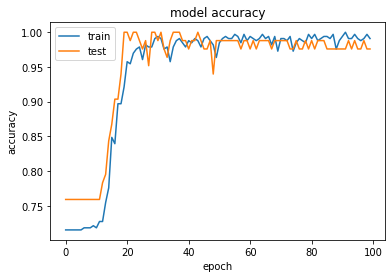

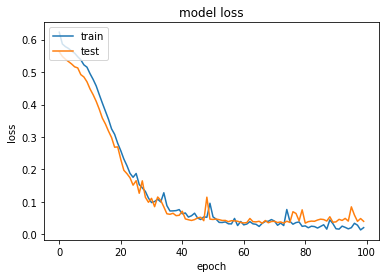

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.predict(x_train)

array([[7.2043240e-03],
       [7.0510507e-03],
       [1.0011792e-03],
       [2.2611916e-03],
       [2.6772022e-03],
       [6.0205758e-03],
       [9.9764347e-01],
       [9.8855716e-01],
       [1.3092160e-03],
       [6.6005290e-03],
       [5.9087276e-03],
       [2.1794140e-03],
       [3.9111972e-03],
       [5.9911609e-03],
       [9.9345899e-01],
       [9.9577230e-01],
       [4.4617355e-03],
       [9.9543154e-01],
       [5.8367550e-03],
       [1.7194450e-03],
       [6.8722963e-03],
       [1.5665591e-03],
       [9.1549754e-04],
       [6.8140924e-03],
       [1.2963116e-03],
       [7.5186789e-03],
       [1.2898445e-03],
       [1.3411045e-03],
       [8.1984156e-01],
       [7.2729588e-03],
       [8.5014105e-04],
       [1.3020635e-03],
       [1.1856258e-03],
       [9.8908138e-01],
       [8.8864565e-04],
       [9.9148059e-01],
       [9.9629366e-01],
       [6.2568188e-03],
       [1.8904507e-03],
       [1.1218488e-03],
       [3.5528243e-03],
       [1.230120